In [633]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

filename='BankChurners.csv'
df=pd.read_csv(filename)

# 은행 신용 카드 서비스 이탈 고객 예측 모델 생성

In [634]:
df.head(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


* CLIENTNUM: 고객 번호 또는 식별자
* Attrition_Flag: 이탈 여부를 나타내는 이진 변수 (0: 이탈하지 않음, 1: 이탈)
* Customer_Age: 고객의 나이
* Gender: 성별 (0: 여성, 1: 남성)
* Dependent_count: 부양 가족 수
* Education_Level: 교육 수준
* Marital_Status: 결혼 여부
* Income_Category: 소득 분류
* Card_Category: 카드 분류
* Months_on_book: 카드 보유 기간 (달)
* Total_Relationship_Count: 고객의 전체 관계 수
* Months_Inactive_12_mon: 12개월 동안 비활성화된 달의 수
* Contacts_Count_12_mon: 12개월 동안 연락한 횟수
* Credit_Limit: 신용 한도
* Total_Revolving_Bal: 리볼빙 잔액 (신용카드 잔액)
* Avg_Open_To_Buy: 실 사용 가능한 신용 한도
* Total_Amt_Chng_Q4_Q1: Q4 대비 Q1의 총 금액 변경 비율
* Total_Trans_Amt: 총 거래 금액
* Total_Trans_Ct: 총 거래 횟수
* Total_Ct_Chng_Q4_Q1: Q4 대비 Q1의 총 거래 횟수 변경 비율
* Avg_Utilization_Ratio: 평균 신용카드 사용 비율
* Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 나이브 베이즈 분류기 예측 결과 1
* Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: 나이브 베이즈 분류기 예측 결과 2

`타겟 변수는 Attrition_Flag(계좌 해지 여부)가 될 것이다.`

마지막 두 컬럼은 NB 분류 작업으로 이뤄진 이전의 작업에 대한 feature로 보인다. 따라서 본 현재 진행하는 앙상블을 이용한 분석에 적합하지 않기 때문에 제거 하고자 한다.

In [635]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis = 1)
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

## 데이터 전처리

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [637]:
df.shape

(10127, 21)

범주형 -> 수치형 변수

In [638]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

`Attrition_Flag` feature의 경우 Existing Customer와 Attrited Customer 범주형 변수이기 때문에 수치형으로 변환해준다. 주제에 맞게 Attrited Customer(이탈 고객) : 1, Existing Customer : 0으로 한다.

In [639]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer' : 0, 'Attrited Customer': 1})

In [640]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

`Gender` 또한 Male아니면 Female 형태의 범주형 변수이기 때문에 이 또한 수치형으로 변환해준다.

In [641]:
df['Gender'] = df['Gender'].replace({'M' : 1,'F' : 0})

변수 제거

CLIENTNUM 또한 고유값이기 때문에 본 분석에서는 제거하고 진행하고자 한다.

In [642]:
del df['CLIENTNUM']

In [643]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## EDA 진행

In [645]:
# 데이터 시각화를 위한 함수를 만듬
""" def bar_plot(cols, target, data, hue = None):
    plt.figure(figsize=(12,8))
    sns.barplot(x=cols, y=target, data = data, hue = hue)
    
def point_plot(cols, target, data, hue = None):
    plt.figure(figsize=(12,8))
    sns.pointplot(x=cols, y=target, data = data, hue = hue)
    plt.xticks(rotation =45) # x 축 눈금 레이블 회전

def box_plot(cols, target, data, hue = None):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=cols, y=target, data = data, hue = hue)
    plt.xticks(rotation =45) # x 축 눈금 레이블 회전
 """
def count_plot(cols, data, hue = None):
    plt.figure(figsize=(12,8))
    sns.countplot(x=cols, data = data, hue = hue) 

* Attrition_Flag(타겟변수)

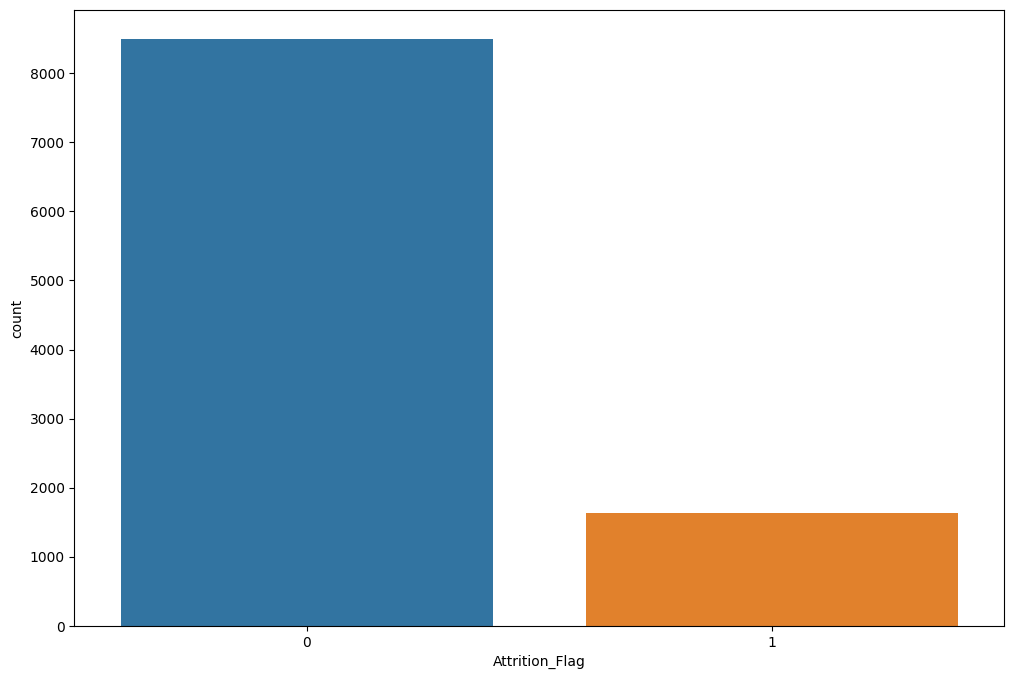

In [646]:
count_plot("Attrition_Flag", df)

이탈 비율은 남성보다 여성이 압도적으로 많은 것을 확인할 수 있다.

* Customer_Age

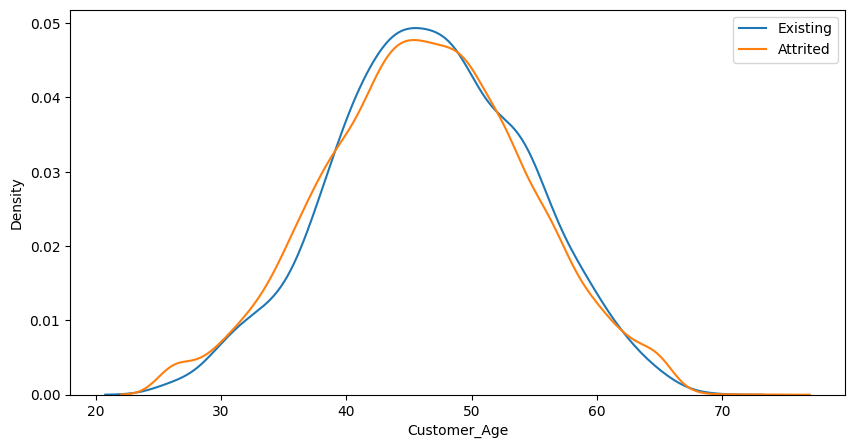

In [647]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # 그래프 여러 개 그리기
sns.kdeplot(x=df[df['Attrition_Flag'] == 1]['Customer_Age'], ax=ax)
sns.kdeplot(x=df[df['Attrition_Flag'] == 0]['Customer_Age'], ax=ax)

plt.legend(['Existing', 'Attrited'])

plt.show()

정규분포 형태를 나타내는 것을 확인할 수 있다. <br>
4~50대 비중이 제일 많다.

* Dependent_count

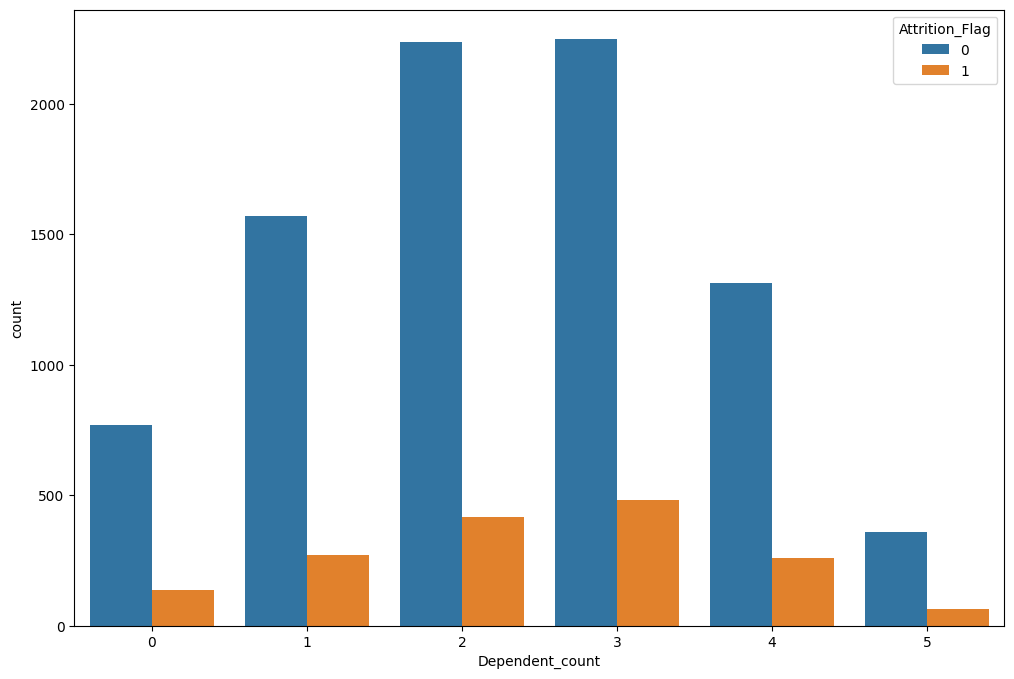

In [648]:
count_plot("Dependent_count", df, hue = "Attrition_Flag")

가족 부양 수는 2~3명이 가장 많다.

* Education_Level

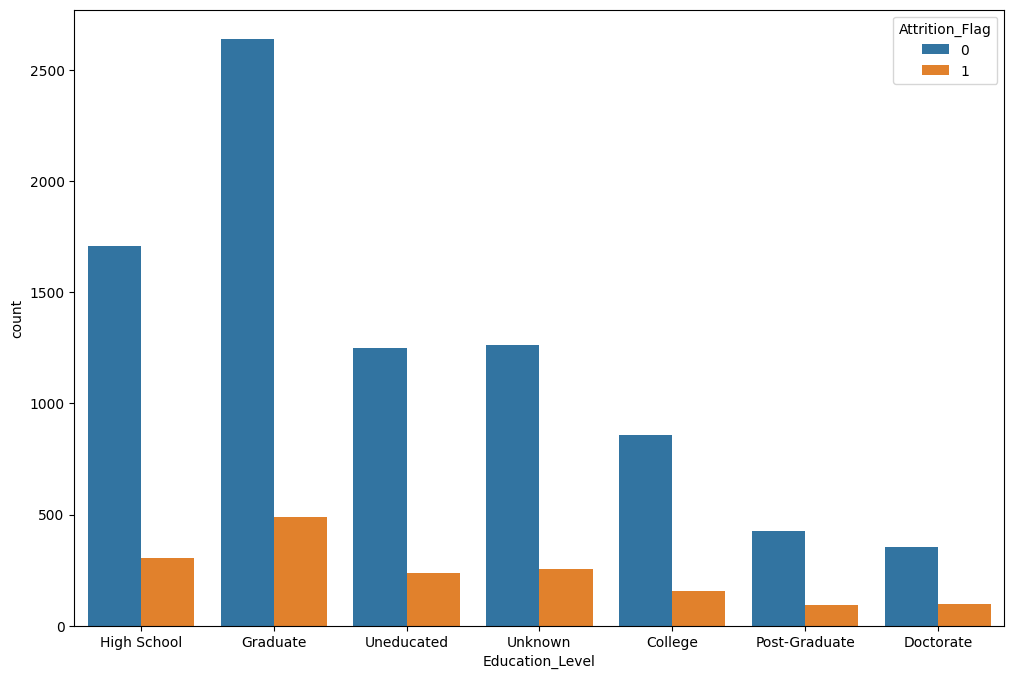

In [649]:
count_plot("Education_Level",df,hue="Attrition_Flag")

학위를 가지지 않은 (uneducated)의 비중을 꽤 차지하고 있음을 확인할 수 있다.

* Marital_Status

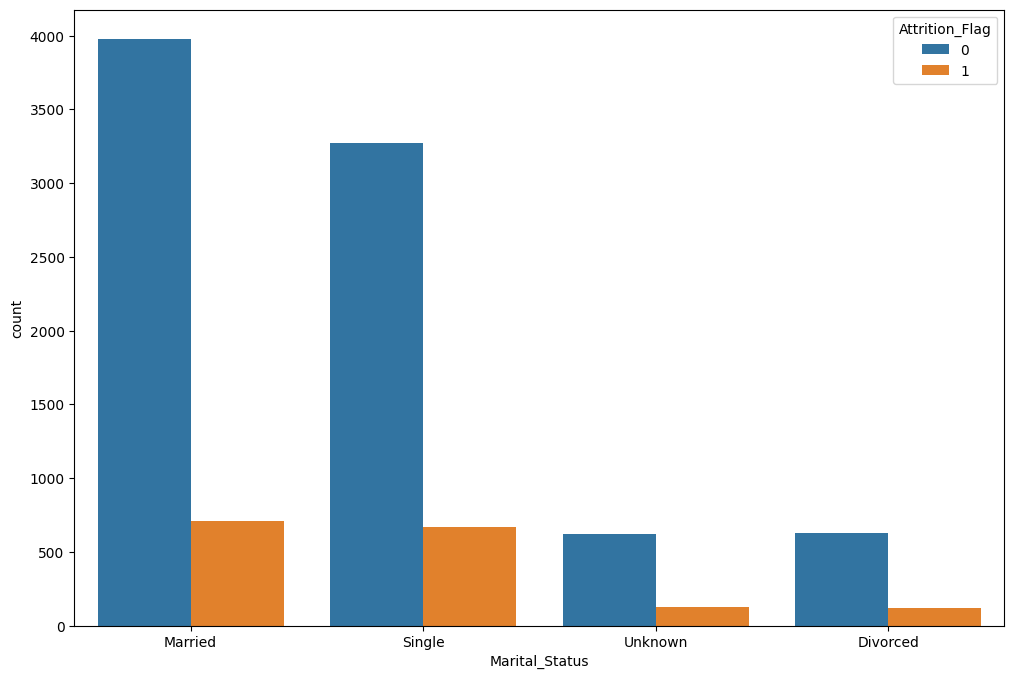

In [650]:
count_plot("Marital_Status",df,hue="Attrition_Flag")

기혼 고객이 가장 많음을 확인할 수 있다.

* Income_Category

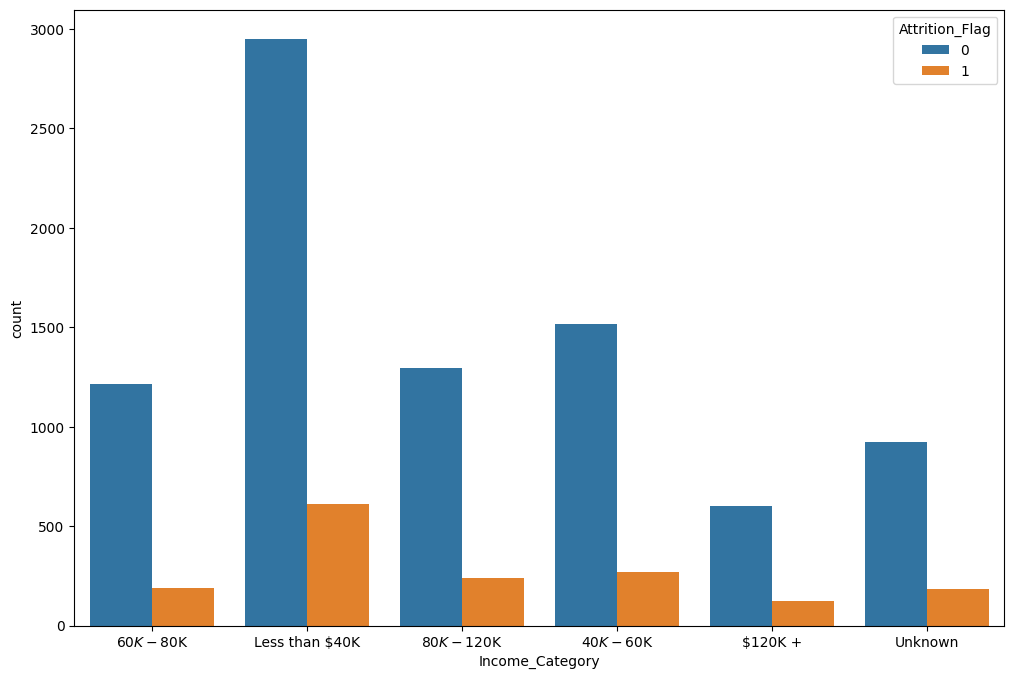

In [651]:
count_plot("Income_Category", df, hue = "Attrition_Flag")

약 30%정도의 사람의 수입이 40K(한화로 5000~5500만원)달러 아래이다.

* Card_Category

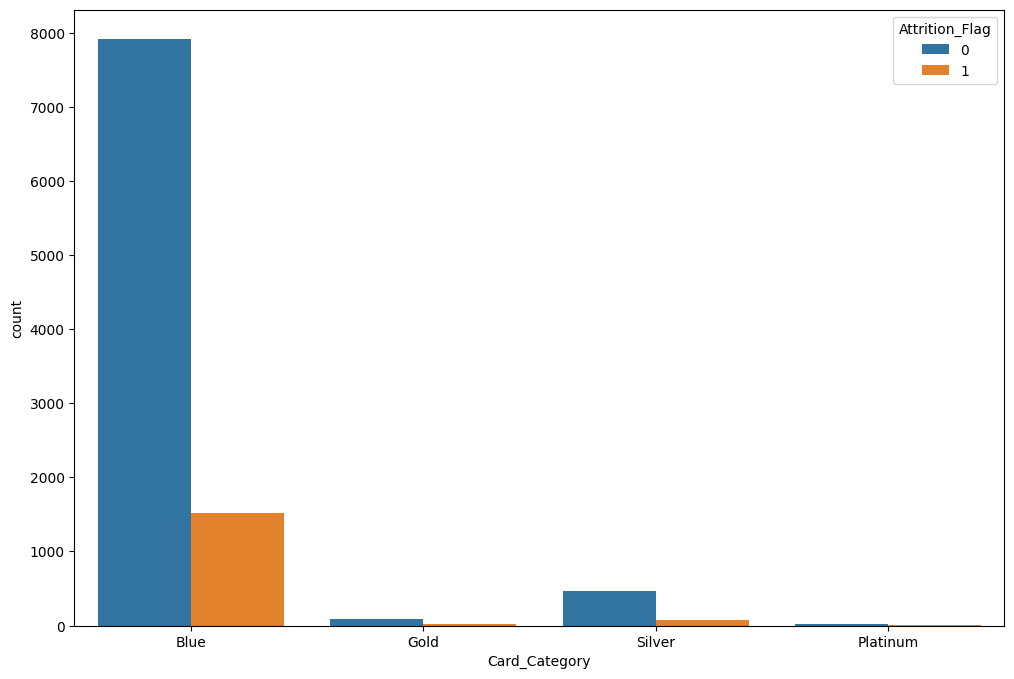

In [652]:
count_plot("Card_Category", df, hue = "Attrition_Flag")

대부분의 사람들은 Blue 카드를 이용하고 있다.

* Months_on_book

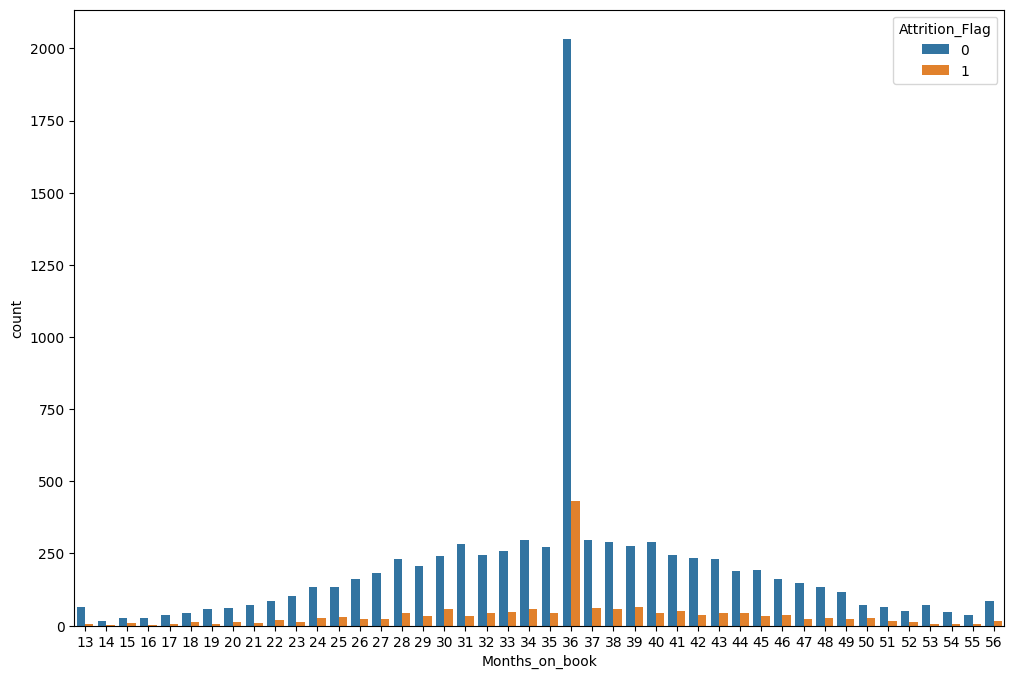

In [653]:
count_plot("Months_on_book", df, hue = "Attrition_Flag")

* Total_Relationship_Count

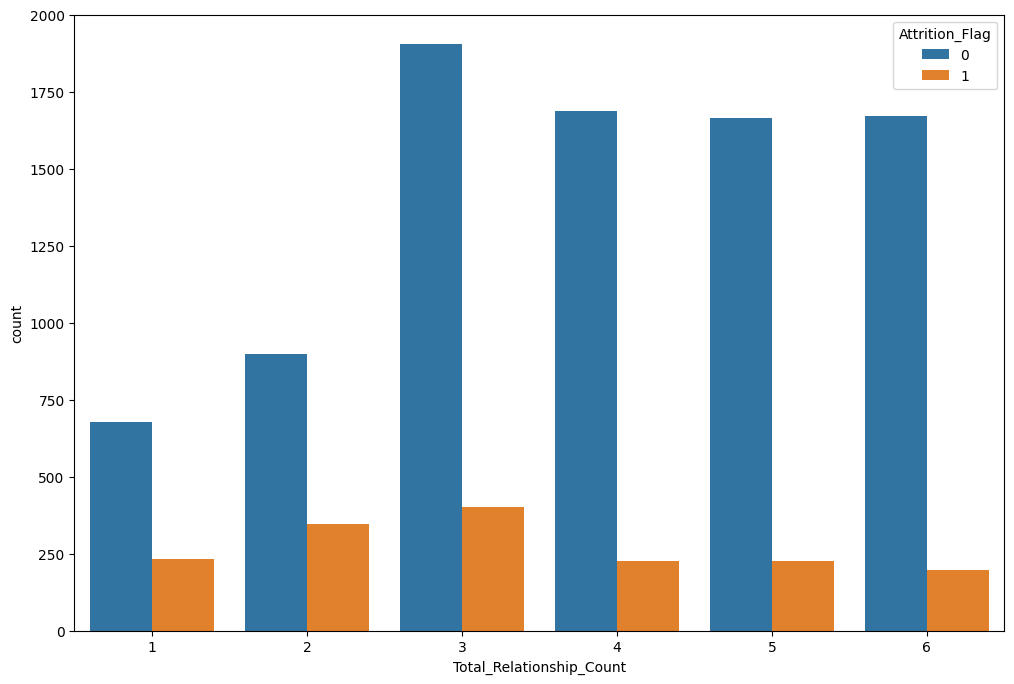

In [654]:
count_plot("Total_Relationship_Count", df, hue = "Attrition_Flag")

* Months_Inactive_12_mon

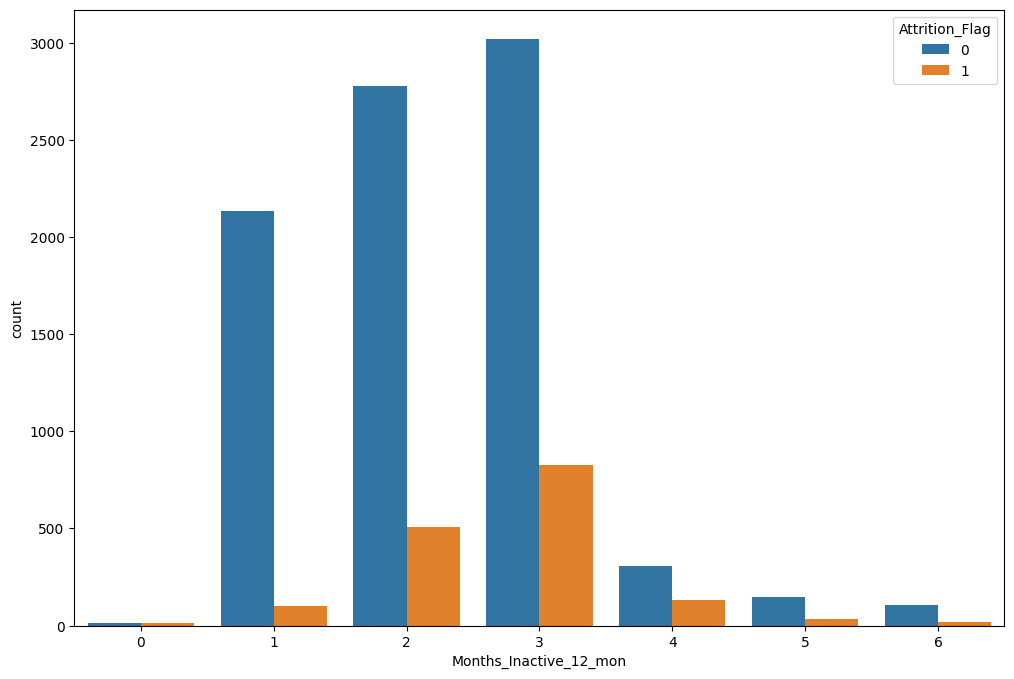

In [655]:
count_plot("Months_Inactive_12_mon", df, hue = "Attrition_Flag")

## OrdinalEncoding 진행 <br> <br>
나머지 범주형 변수 `Marital_Status, Education_Level, Income_Category, Card_Category`도 OrdinalEncoding을 통해 수치형 변수로 바꿔준다.

In [656]:
from sklearn.preprocessing import OrdinalEncoder

marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
df['Marital_Status'] = marital.fit_transform(df[['Marital_Status']])

edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate',
                                  'Post-Graduate','Doctorate']])
df['Education_Level'] = edu.fit_transform(df[['Education_Level']])

income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K',
                                     '$80K - $120K','$120K +']])
df['Income_Category'] = income.fit_transform(df[['Income_Category']])

card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
df['Card_Category'] = card.fit_transform(df[['Card_Category']])

In [657]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2.0,2.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,4.0,1.0,1.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,4.0,2.0,4.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,2.0,0.0,1.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,1.0,2.0,3.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [658]:
from sklearn.preprocessing import StandardScaler

# scaler 진행
credit = StandardScaler()
df['Credit_Limit'] = credit.fit_transform(df[['Credit_Limit']])

revolv_bal = StandardScaler()
df['Total_Revolving_Bal'] = revolv_bal.fit_transform(df[['Total_Revolving_Bal']])

avg_open = StandardScaler()
df['Avg_Open_To_Buy'] = avg_open.fit_transform(df[['Avg_Open_To_Buy']])

trans = StandardScaler()
df['Total_Trans_Amt'] = trans.fit_transform(df[['Total_Trans_Amt']])

In [659]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2.0,2.0,3.0,0.0,39,5,1,3,0.446622,-0.473422,0.488971,1.335,-0.959707,42,1.625,0.061
1,0,49,0,5,4.0,1.0,1.0,0.0,44,6,1,2,-0.041367,-0.366667,-0.008486,1.541,-0.916433,33,3.714,0.105
2,0,51,1,3,4.0,2.0,4.0,0.0,36,4,1,0,-0.573698,-1.426858,-0.445658,2.594,-0.740982,20,2.333,0.000
3,0,40,0,4,2.0,0.0,1.0,0.0,34,3,4,1,-0.585251,1.661686,-0.734100,1.405,-0.951758,20,2.333,0.760
4,0,40,1,3,1.0,2.0,3.0,0.0,21,5,1,0,-0.430877,-1.426858,-0.302868,2.175,-1.056263,28,2.500,0.000


## Ensemble 구현

In [660]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Attrition_Flag'], test_size=0.3, shuffle = True, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7088, 19), (7088,), (3039, 19), (3039,))

In [661]:
# scaler 진행

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [662]:
rf = RandomForestClassifier(random_state = 42, n_estimators=20)
xgb = xgboost.XGBClassifier(use_label_encoder=False)

c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


랜덤포레스트

In [663]:
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_pred_rf, y_test)

print(f"rf_accuracy_score : {accuracy_rf}")

rf_accuracy_score : 1.0


xgboost

In [664]:
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_pred_xgb, y_test)

print(f"rf_accuracy_score : {accuracy_xgb}")

rf_accuracy_score : 1.0


* 랜덤포레스트, XGBoost 모두 정확도 1이 나오는 것을 볼 수 있다.
* 사실상 정확도가 1이 나오는 것은 극히 드물기 때문에 데이터 전처리 하는 과정에서 문제가 생겼을 가능성이 크다...
* 혹은 과도하게 overfitting이 이뤄진 것일 수도 있다. 

Voting

In [665]:
voting = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')

# 보팅 앙상블 학습 및 예측
voting.fit(X_train_scaled, y_train)
y_pred_voting = voting.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_pred_voting, y_test)
print(f"Voting_accuracy_score: {accuracy_voting}")

Voting_accuracy_score: 1.0


c:\Users\gjm10\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


랜덤포레스트와 xgboost 두 모델을 보팅 앙상블로 결합하여 나타냈지만, 이 또한 정확도가 1이 나온 것을 확인할 수 있다..



